In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [3]:
Test_i = pd.read_csv(r'D:\UNAD\Ultimo semestre\Analisis de datos\Tarea 5\Anexo 1 - Dataset Titanic EDA\test.csv')

In [4]:
Test_C = pd.read_csv(r'D:\UNAD\Ultimo semestre\Analisis de datos\Tarea 5\Anexo 1 - Dataset Titanic EDA\gender_submission.csv')

In [5]:
# se si hio la union del archivo gender y test para completar la informacion ya que en el archivo 
#test no estaba la columna sobrevivientes asi que se realizo una union por medio del PassengerId y se creo un nuevo archivo
# con toda la informacion llamado Test_completo
Test_completo = pd.merge(Test_i, Test_C, on='PassengerId', how='inner')

In [7]:
Test_completo.head(50)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [8]:
Train = pd.read_csv(r'D:\UNAD\Ultimo semestre\Analisis de datos\Tarea 5\Anexo 1 - Dataset Titanic EDA\train.csv')

In [9]:
Train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
Train.shape

(891, 12)

In [12]:
Test_completo.shape

(418, 12)

In [14]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
Test_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [17]:
# Crear columnas one-hot para la columna "Sex"
one_hot_encoded = pd.get_dummies(Test_completo['Sex'], prefix='Sex')

# Concatenar las columnas one-hot al DataFrame original
Test_completo = pd.concat([Test_completo, one_hot_encoded], axis=1)

In [18]:
Test_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
 12  Sex_female   418 non-null    bool   
 13  Sex_male     418 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(5)
memory usage: 40.1+ KB


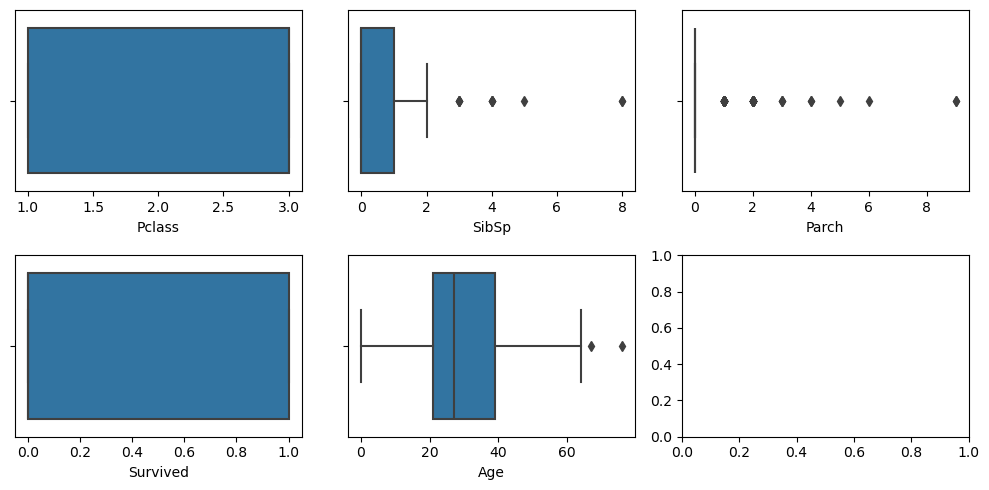

In [26]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(x=Test_completo['Pclass'], ax = axs[0,0])
plt2 = sns.boxplot(x=Test_completo['SibSp'], ax = axs[0,1])
plt3 = sns.boxplot(x=Test_completo['Parch'], ax = axs[0,2])
plt4 = sns.boxplot(x=Test_completo['Survived'], ax = axs[1,0])
plt5 = sns.boxplot(x=Test_completo['Age'], ax = axs[1,1])
plt.tight_layout()

In [28]:
print("Cantidad de Registros con cero años: ",Test_completo['Age'].isin([0]).sum())

Cantidad de Registros con cero años:  0


In [29]:
Test_completo['Age'].fillna(Test_completo['Age'].mode()[0], inplace=True)

In [30]:
Test_completo['Fare'].fillna(Test_completo['Fare'].mode()[0], inplace=True)

In [31]:
Test_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
 12  Sex_female   418 non-null    bool   
 13  Sex_male     418 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(5)
memory usage: 40.1+ KB


In [32]:
Test_completo.drop(columns=['PassengerId'], inplace=True)
Test_completo.drop(columns=['Name'], inplace=True)
Test_completo.drop(columns=['Sex'], inplace=True)
Test_completo.drop(columns=['Ticket'], inplace=True)
Test_completo.drop(columns=['Cabin'], inplace=True)
Test_completo.drop(columns=['Embarked'], inplace=True)

In [33]:
# se limpio y se hizo el analisis explortorio de los datos test
Test_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        418 non-null    float64
 5   Survived    418 non-null    int64  
 6   Sex_female  418 non-null    bool   
 7   Sex_male    418 non-null    bool   
dtypes: bool(2), float64(2), int64(4)
memory usage: 20.5 KB


In [34]:
# se inicia el anlisis exploratorio de los datos Train
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
# Crear columnas one-hot para la columna "Sex"
one_hot_encoded = pd.get_dummies(Train['Sex'], prefix='Sex')

# Concatenar las columnas one-hot al DataFrame original
Train = pd.concat([Train, one_hot_encoded], axis=1)

In [36]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Sex_female   891 non-null    bool   
 13  Sex_male     891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(5)
memory usage: 85.4+ KB


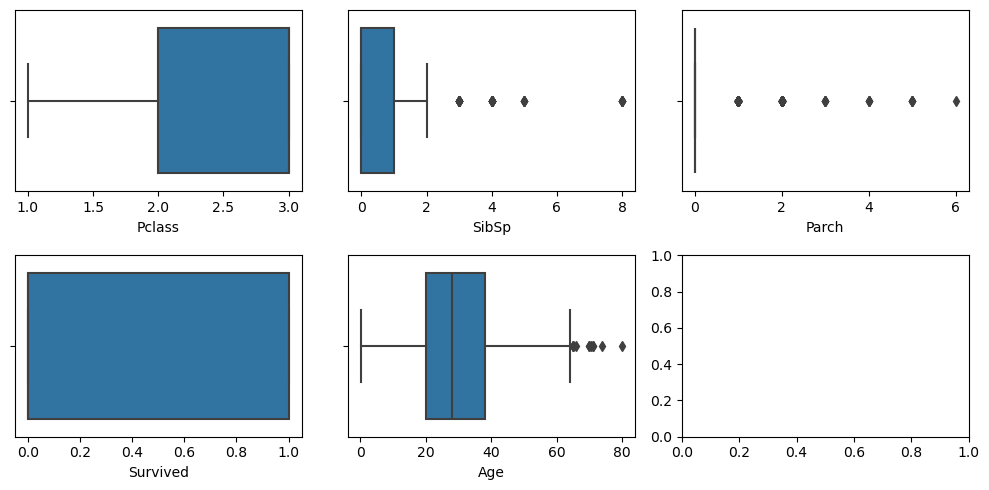

In [37]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(x=Train['Pclass'], ax = axs[0,0])
plt2 = sns.boxplot(x=Train['SibSp'], ax = axs[0,1])
plt3 = sns.boxplot(x=Train['Parch'], ax = axs[0,2])
plt4 = sns.boxplot(x=Train['Survived'], ax = axs[1,0])
plt5 = sns.boxplot(x=Train['Age'], ax = axs[1,1])
plt.tight_layout()

In [38]:
print("Cantidad de Registros con cero años: ",Train['Age'].isin([0]).sum())

Cantidad de Registros con cero años:  0


In [39]:
Train['Age'].fillna(Train['Age'].mode()[0], inplace=True)

In [40]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Sex_female   891 non-null    bool   
 13  Sex_male     891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(5)
memory usage: 85.4+ KB


In [41]:
Train.drop(columns=['PassengerId'], inplace=True)
Train.drop(columns=['Name'], inplace=True)
Train.drop(columns=['Sex'], inplace=True)
Train.drop(columns=['Ticket'], inplace=True)
Train.drop(columns=['Cabin'], inplace=True)
Train.drop(columns=['Embarked'], inplace=True)

In [42]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    bool   
 7   Sex_male    891 non-null    bool   
dtypes: bool(2), float64(2), int64(4)
memory usage: 43.6 KB


In [43]:
X_train = Train.drop('Survived',axis=1)
Y_train = Train['Survived']

In [44]:
modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (X_train , Y_train)   

LogisticRegression(solver='liblinear')

In [45]:
# ahora evaluamos el modelo usando los datos de prueba Test
X_test = Test_completo.drop(columns=['Survived'])
y_test = Test_completo['Survived']

In [46]:
Prediccion = modelo_regresion.predict(X_test)

In [48]:
print (y_test)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [49]:
print (Prediccion)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [50]:
print(classification_report(y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       266
           1       0.92      0.95      0.93       152

    accuracy                           0.95       418
   macro avg       0.94      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



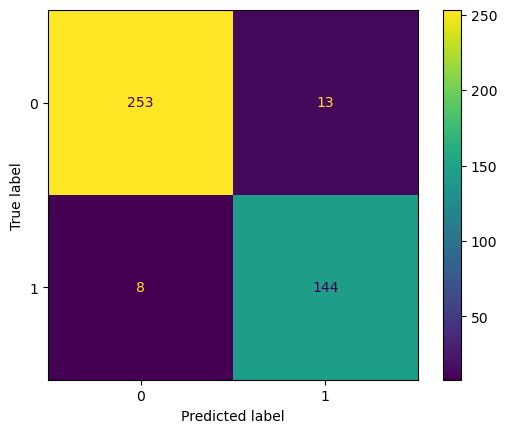

In [51]:
cm=confusion_matrix(y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [52]:
#la matris de confusion nos muestra los valores que fueron predichos correctamente y los que no, nos muestra los verdaderos positivos y tambien los
# falsos positivos.

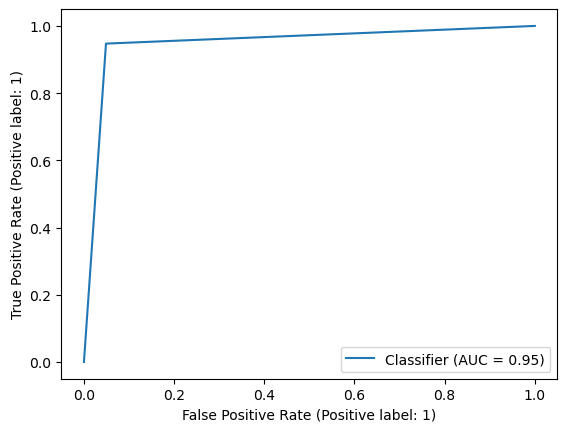

In [53]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, Prediccion)
plt.show()